<left><img src="arch.png" alt="drawing" width="7%" /></left> **<h4 align = "center"> Instituto de Matemática e Estatística da Universidade de São Paulo </h4>**
**<h4 align = "center"> MAC0459 - Ciência e Engenheria de Dados </h4>**
**<h5 align = "center">  Victor Senoguchi Borges NUSP 9298580 </h5>**
**<h5 align = "center">  Professor: Roberto Hirata Junior </h5>**
**<h5 align = "center">  General Test - 2021 </h5>**
**<h6 align = "center">  By uploding this test I declare that I have worked on it alone
            and I know that I can be failed in the discipline if I break this
            circle of confidence. </h6>**
<center> São Paulo, Janeiro de 2022

# **Importes Iniciais**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Q1.** 
Formule cinco questões para o seguinte conjunto de dados [Ocorrências Aeronáuticas na Aviação Civil Brasileira](https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira) e:

  1. resolva essas questões usando métodos de análise exploratória de dados e visualizações;

  2. resolva essas questões usando o Neo4j;

  3. compare ambas as abordagens


## Análise exploratória dos dados



In [ ]:
aeronave = pd.read_csv('aeronave.csv', sep = ';')

In [ ]:
ocorrencia = pd.read_csv('ocorrencia.csv', sep =';')

In [ ]:
tipo_ocorrencia = pd.read_csv('ocorrencia_tipo.csv', sep = ';')

In [ ]:
fator = pd.read_csv('fator_contribuinte.csv', sep = ';')

In [ ]:
recomendacao = pd.read_csv('recomendacao.csv', sep = ';')

In [ ]:
ocorrencia_tipo = pd.read_csv('ocorrencia_tipo.csv', sep = ';')

### **Questão 1**.
Uma questão que surge naturalmente é qual o tipo de segmento é mais perigoso, entretanto, talvez não seja possível com $100\%$ de certeza resolver tal questão, pois, não temos a proporção para cada tipo de segmento, mas podemos responder qual o tipo de ocorrencia mais frequente em cada segmento e a partir disso inferir qual segmento oferece menos segurança.

In [ ]:
ocorrencia.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,...,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,...,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
list(aeronave['aeronave_registro_segmento'].unique())

['PARTICULAR',
 'REGULAR',
 'AGRÍCOLA',
 'EXPERIMENTAL',
 'TÁXI AÉREO',
 'INSTRUÇÃO',
 'ESPECIALIZADA',
 'ADMINISTRAÇÃO DIRETA',
 'ADMINISTRAÇÃO INDIRETA',
 '***',
 'NÃO REGULAR',
 'MÚLTIPLA',
 'HISTÓRICA']

In [ ]:
ocorrencia['segmento'] = aeronave['aeronave_registro_segmento']

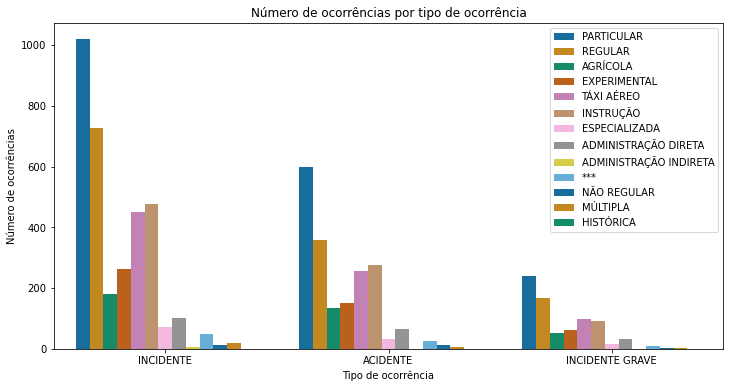

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data = ocorrencia, x = 'ocorrencia_classificacao', 
              palette = 'colorblind', hue = 'segmento')
plt.title('Número de ocorrências por tipo de ocorrência')
plt.xlabel('Tipo de ocorrência')
plt.ylabel('Número de ocorrências')
plt.legend(loc='upper right')
plt.show()

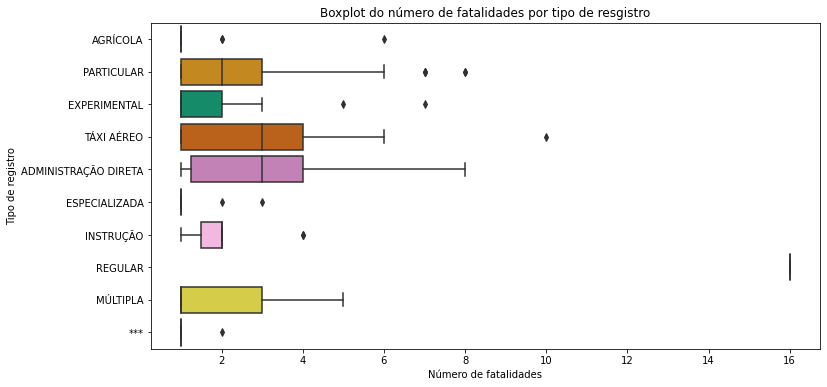

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = sns.boxplot(data = aeronave[aeronave['aeronave_fatalidades_total'] > 0],
                 x = 'aeronave_fatalidades_total', 
                 y = 'aeronave_registro_segmento',
                 palette = 'colorblind')
plt.title('Boxplot do número de fatalidades por tipo de resgistro')
plt.ylabel('Tipo de registro')
plt.xlabel('Número de fatalidades')
plt.show()

Como pudemos observar nos gráficos os segmentos com mais ocorrências são particular, regular, instrução e táxi aério em ordem decrescente de ocorrências, além disso, podemos observar pelo boxplot de fatalidades que há somente uma ocorrência com fatalidades no segmento regular, mas esse tem um grande número de fatalidades, enquanto que nos segmentos particular e táxi aério parecem haver mais ocorrências com fatalidades, porém a média de fatalidades é bem menor. Podemos por fim concluir que os segmentos particular e táxi aério são os mais perígosos.

### **Questão 2**.
Uma outra questão que aparece é qual o principal fator da causa desses acidentes, serão esses fatores diretamente humanos como erro do piloto, ou, fatores que poderiam ser evitados com manutenção da aeronave como troca de peças, etc.

In [ ]:
fator.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


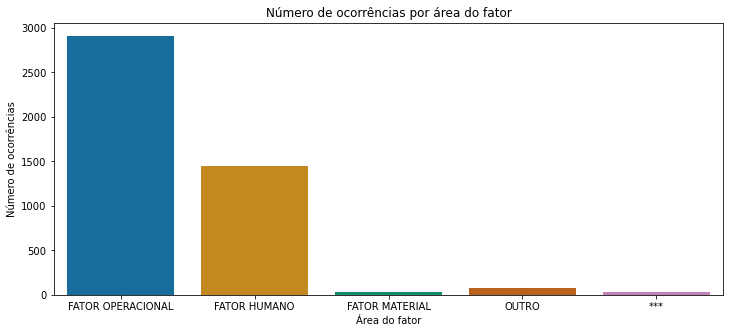

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = fator, x = 'fator_area', 
              palette = 'colorblind')
plt.title('Número de ocorrências por área do fator')
plt.xlabel('Área do fator')
plt.ylabel('Número de ocorrências')
plt.show()

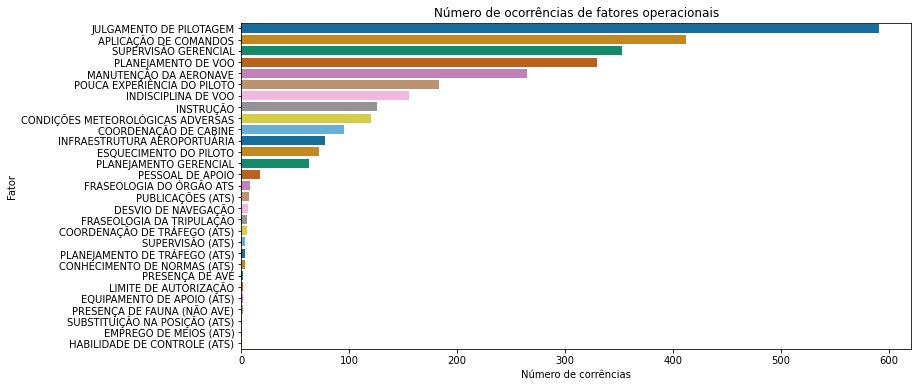

In [ ]:
data = fator[fator['fator_area'] == 'FATOR OPERACIONAL']
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data = data,
                   y = 'fator_nome', 
                   order = data['fator_nome'].value_counts().index,
                   palette = 'colorblind')
plt.title('Número de ocorrências de fatores operacionais')
plt.xlabel('Número de corrências')
plt.ylabel('Fator')
plt.show()

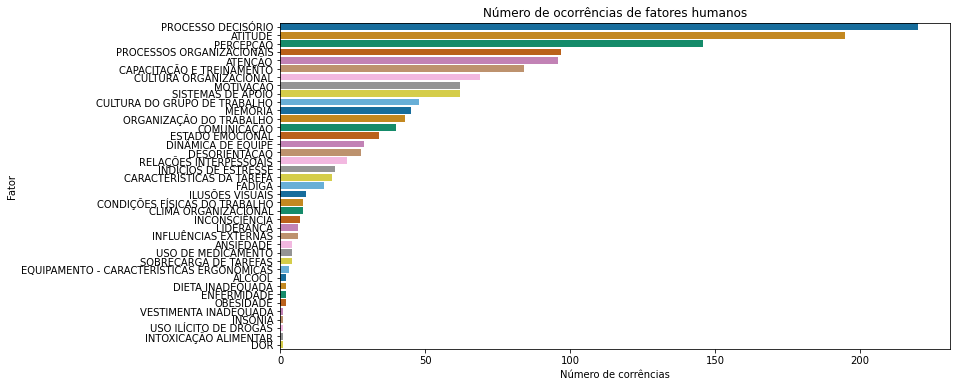

In [ ]:
data = fator[fator['fator_area'] == 'FATOR HUMANO']
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data = data,
                   y = 'fator_nome', 
                   order = data['fator_nome'].value_counts().index,
                   palette = 'colorblind')
plt.title('Número de ocorrências de fatores humanos')
plt.xlabel('Número de corrências')
plt.ylabel('Fator')
plt.show()

Podemos observar nos gráficos acimas que as principais causas das ocorrências decorrem de fatores operacionais e fatores humanos, e que dentro dos fatores operacionais os principais fatores também são causados por humanos, por exemplo os quatro fatores operacionais com mais ocorrências são julgamento de pilotagem, aplicação de comandos, supervisão gerencial e planejamento de voo, enquanto que somente o quinto fator com mais ocorrências é dado a manutenção da aeronave, desse modo, é possível concluir que humanos estão diretamente relacionados com a maior parte das ocorrências.

### **Questão 3**.
Existe alguma fabricante de aeronaves que se destaca no número de ocorrências? Existe algum modelo específico de aeronave que se sobressai? E qual o principal fator dessas ocorrências? 

In [ ]:
aeronave['aeronave_fabricante'].value_counts()

CESSNA AIRCRAFT                                    960
EMBRAER                                            690
NEIVA INDUSTRIA AERONAUTICA                        685
PIPER AIRCRAFT                                     437
***                                                363
                                                  ... 
VANS                                                 1
MENDES-ADM PARTICIPACOES E EMPREENDIMENTOS LTDA      1
MARCO AURELIO M. DE SOUSA                            1
JOAO BATISTA COUTINHO JUNIOR                         1
SLICK AIRCRAFT COMPANY                               1
Name: aeronave_fabricante, Length: 251, dtype: int64

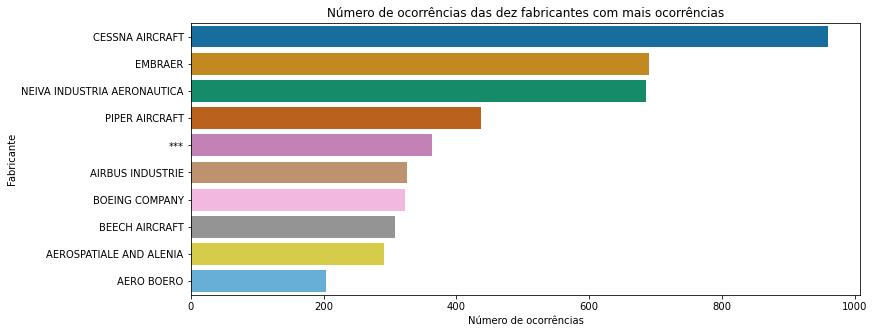

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = aeronave,
                   y = 'aeronave_fabricante',
                   order = aeronave['aeronave_fabricante'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências das dez fabricantes com mais ocorrências')
plt.xlabel('Número de ocorrências')
plt.ylabel('Fabricante')
plt.show()

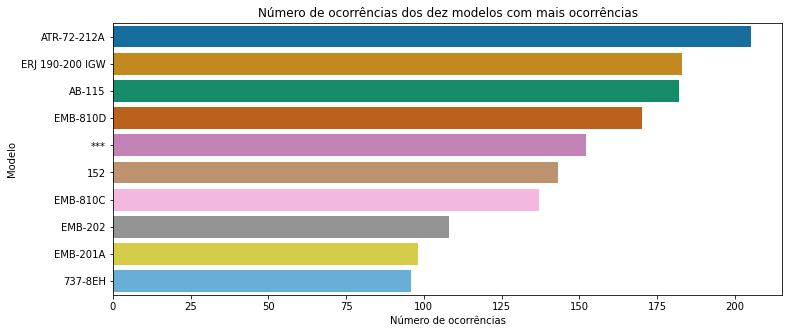

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = aeronave,
                   y = 'aeronave_modelo',
                   order = aeronave['aeronave_modelo'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências dos dez modelos com mais ocorrências')
plt.xlabel('Número de ocorrências')
plt.ylabel('Modelo')
plt.show()

In [ ]:
modelo = aeronave['aeronave_modelo'].value_counts()[:1].index[0]

In [ ]:
fator['modelo'] = aeronave['aeronave_modelo'] 

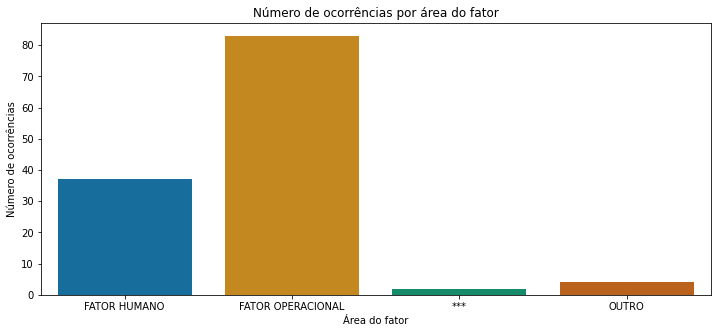

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = fator[fator['modelo'] == modelo],
                   x = 'fator_area',
                   palette = 'colorblind')
plt.title('Número de ocorrências por área do fator')
plt.xlabel('Área do fator')
plt.ylabel('Número de ocorrências')
plt.show()

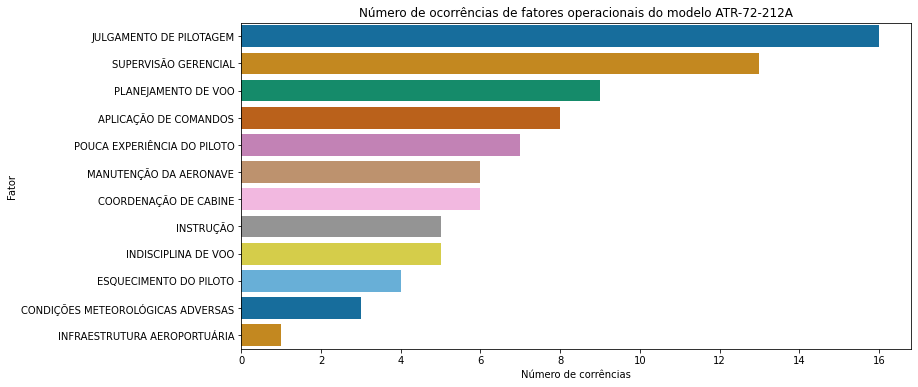

In [ ]:
fig = plt.figure(figsize=(12,6))
data = fator[(fator['modelo'] == modelo) & (fator['fator_area'] == 'FATOR OPERACIONAL')]
ax = sns.countplot(data = data,
                   y = 'fator_nome', 
                   order = data['fator_nome'].value_counts().index,
                   palette = 'colorblind')
plt.title('Número de ocorrências de fatores operacionais do modelo {}'.format(modelo))
plt.xlabel('Número de corrências')
plt.ylabel('Fator')
plt.show()

Vemos no primeiro gráfico que as fabricantes Cessna Aircraft, Embraer e Indústria Aeronáutica Neiva se sobressaem nos números de ocorrências, além disso, também é importante pontuar que a Indústria Aeronáutica Neiva foi incorporada pela Embraer, assim apesar da Cessna Aircraft ter mais ocorrências que a Embraer e Indústria Aeronáutica Neiva, se condiderarmos as duas fabricantes juntas, essas superam o número de ocorrências da Cessna Aircraft. Já o modelo com mais ocorrências é o ATR-72-212A da fabricante Aérospatiale e não vemos nada de incomum nos fatores das ocorrências.

### **Questão 4**.
Em quais fases de operação ocorrências são mais comuns? Existe alguma relação da fase de operação da ocorrência e a origem ou destino do voo? E o tipo de operação?

In [ ]:
aeronave['aeronave_fase_operacao'].unique()

array(['DECOLAGEM', 'ARREMETIDA NO AR', 'SUBIDA', 'CRUZEIRO',
       'APROXIMAÇÃO FINAL', 'POUSO', 'DESCIDA', 'CORRIDA APÓS POUSO',
       'ESPECIALIZADA', 'OUTRA FASE', 'VOO A BAIXA ALTURA', 'TÁXI',
       'MANOBRA', 'CHEQUE DE MOTOR OU ROTOR', 'CIRCUITO DE TRÁFEGO',
       'PARTIDA DO MOTOR', 'RETA FINAL', 'PAIRADO', 'INDETERMINADA',
       'ESPERA', 'ESTACIONAMENTO', 'OPERAÇÃO DE SOLO',
       'ARREMETIDA NO SOLO', 'DECOLAGEM VERTICAL',
       'PROCEDIMENTO DE APROXIMAÇÃO IFR', 'PUSHBACK', 'SAÍDA IFR',
       'DESCIDA DESCONTROLADA', 'MUDANÇA DE NÍVEL OU ALTITUDE',
       'EMPREGO MILITAR', 'DESCIDA DE EMERGÊNCIA', '***'], dtype=object)

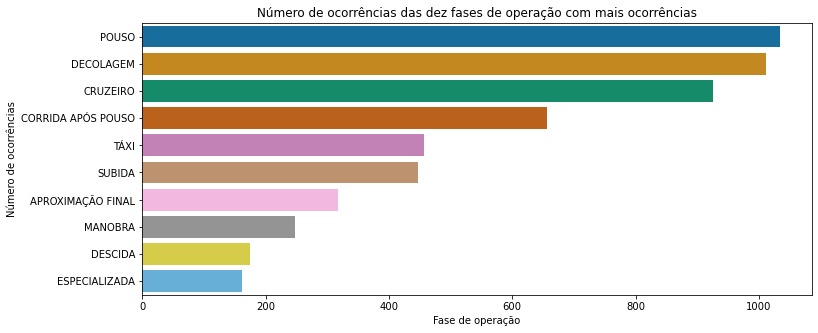

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = aeronave, 
                   y = 'aeronave_fase_operacao',
                   order = aeronave['aeronave_fase_operacao'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências das dez fases de operação com mais ocorrências')
plt.xlabel('Fase de operação')
plt.ylabel('Número de ocorrências')
plt.show()

In [ ]:
aeronave['aeronave_voo_origem'].value_counts()

FORA DE AERODROMO                  2766
***                                 168
CAMPO DE MARTE                      107
GOVERNADOR ANDRÉ FRANCO MONTORO      98
VIRACOPOS                            92
                                   ... 
FAZENDA TRÊS UNIDOS                   1
CAMOCIM                               1
ALIMENTOS DALLAS                      1
SÍTIO GURUPI                          1
LÊDA MELLO DE REZENDE                 1
Name: aeronave_voo_origem, Length: 688, dtype: int64

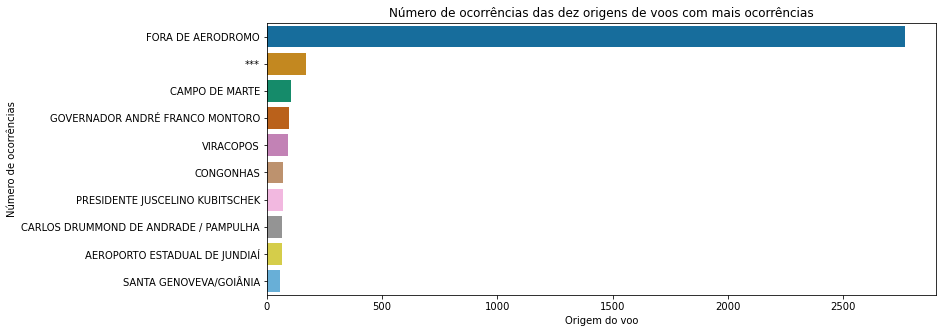

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = aeronave, 
                   y = 'aeronave_voo_origem',
                   order = aeronave['aeronave_voo_origem'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências das dez origens de voos com mais ocorrências')
plt.ylabel('Origem do voo')
plt.xlabel('Número de ocorrências')
plt.show()

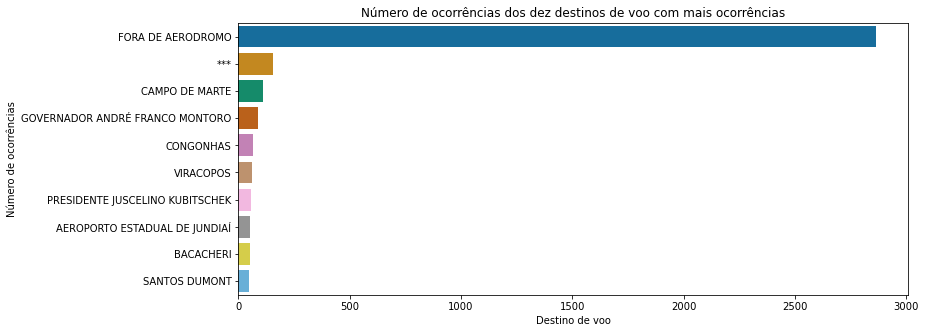

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data = aeronave, 
                   y = 'aeronave_voo_destino',
                   order = aeronave['aeronave_voo_destino'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências dos dez destinos de voo com mais ocorrências')
plt.ylabel('Destino de voo')
plt.xlabel('Número de ocorrências')
plt.show()

In [ ]:
fora_aerodromo = aeronave[aeronave['aeronave_voo_origem'] == 'FORA DE AERODROMO']
fora_aerodromo = fora_aerodromo[fora_aerodromo['aeronave_voo_destino'] == 'FORA DE AERODROMO']

In [ ]:
fora_aerodromo['aeronave_fase_operacao'].value_counts()[:10].index

Index(['DECOLAGEM', 'POUSO', 'CRUZEIRO', 'TÁXI', 'CORRIDA APÓS POUSO',
       'SUBIDA', 'APROXIMAÇÃO FINAL', 'MANOBRA', 'ESPECIALIZADA',
       'CIRCUITO DE TRÁFEGO'],
      dtype='object')

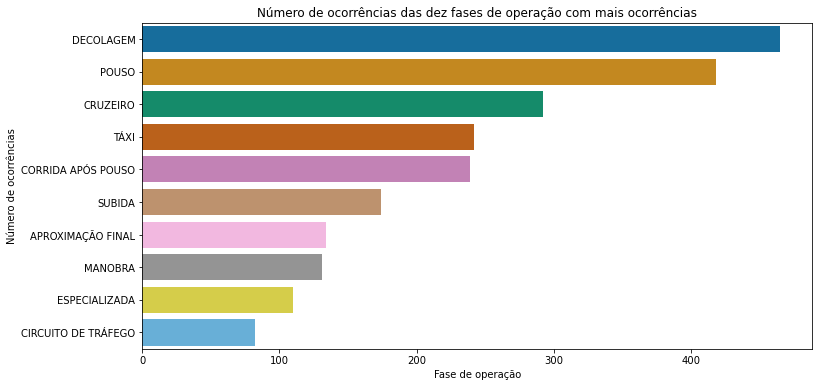

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data = fora_aerodromo,
                   y = 'aeronave_fase_operacao',
                   order = fora_aerodromo['aeronave_fase_operacao'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências das dez fases de operação com mais ocorrências')
plt.ylabel('Fase de operação')
plt.xlabel('Número de ocorrências')
plt.show()

In [ ]:
aerodromo = aeronave[aeronave['aeronave_voo_origem'] != 'FORA DE AERODROMO']
aerodromo = aerodromo[aerodromo['aeronave_voo_destino'] != 'FORA DE AERODROMO']

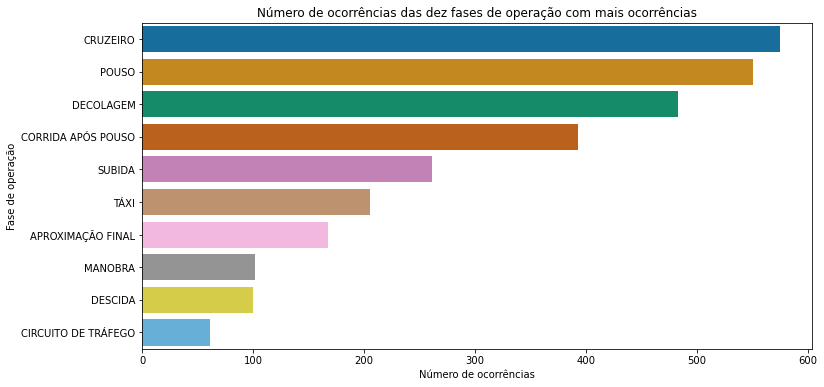

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data = aerodromo,
                   y = 'aeronave_fase_operacao',
                   order = aerodromo['aeronave_fase_operacao'].value_counts()[:10].index,
                   palette = 'colorblind')
plt.title('Número de ocorrências das dez fases de operação com mais ocorrências')
plt.ylabel('Fase de operação')
plt.xlabel('Número de ocorrências')
plt.show()

Note que as fases de operação das ocorrências em geral estão relacionadas ao ínicio e final de voo, e que a maior parte dessas ocorrências ocorrem quando a origem e destino final do voo são fora de um aerodromo.

### **Questão 5**.
Em quais estados do Brasil houve mais ocorrências? 

In [ ]:
ocorrencia['ocorrencia_pais'].unique()

array(['BRASIL'], dtype=object)

In [ ]:
ocorrencia['ocorrencia_uf'].unique()

array(['RJ', 'PA', 'MT', 'RS', 'BA', 'AM', 'PR', 'MG', 'SP', 'DF', 'AC',
       'TO', 'SC', 'GO', 'MA', 'ES', 'PE', 'RR', 'MS', 'CE', 'AP', 'AL',
       'RO', 'SE', 'PB', 'PI', 'RN', '***'], dtype=object)

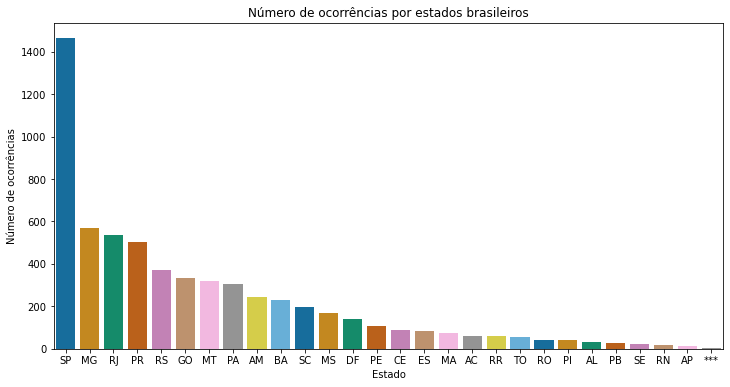

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data = ocorrencia,
                   x = 'ocorrencia_uf',
                   order = ocorrencia['ocorrencia_uf'].value_counts().index,
                   palette = 'colorblind')
plt.title('Número de ocorrências por estados brasileiros')
plt.xlabel('Estado')
plt.ylabel('Número de ocorrências')
plt.show()

Podemos ver claramente pelo gráfico acima que com exceção do estado do Espírito Santos, os estados com mais acidentes são os estados do Sudeste brasileiro, além disso, o estado de São Paulo sozinho tem $1464$ ocorrências o que representa mais de $20\%$ de todas as ocorrências e tem mais que o dobro de ocorrências que o segundo estado que é Minas Gerais com $570$ ocorrências.